In [1]:
import os
os.chdir('./')
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def est_nom_fichier_valide(nom_fichier, n):
    return nom_fichier.startswith('report_shadow_model_' + str(n) +'_') and nom_fichier.endswith('.json')

def recup_data(dossier, values):
    donnees_json = []
    for n in values:
        donnees_json.append([])
        for nom_fichier in os.listdir(dossier):
            chemin_fichier = os.path.join(dossier, nom_fichier)
            if os.path.isfile(chemin_fichier) and est_nom_fichier_valide(nom_fichier, n):
                # Lire le fichier JSON
                with open(chemin_fichier, 'r') as fichier:
                    donnees = json.load(fichier)
                    donnees_json[-1]+=donnees      
    groupe=[]
    valeur=[]
    for i in range(len(values)):
        groupe+=[values[i]]*len(donnees_json[i])
        valeur+=donnees_json[i]
    # Créez un DataFrame exemple
    donnees = {
        'Groupe': groupe,
        'Valeur': valeur
    }            
    return donnees

## Result on Adult

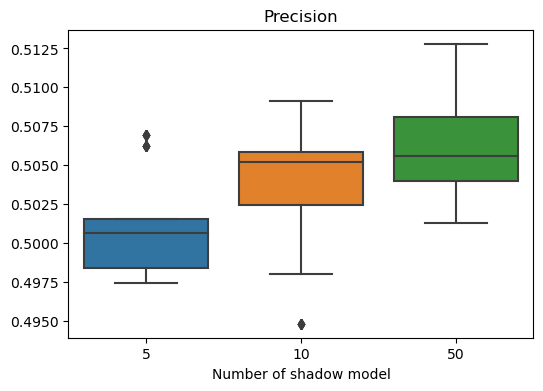

In [32]:
donnees=recup_data('./adult/data', [5,10,20,50])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['precision']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('Precision')
plt.xlabel('Number of shadow model')
plt.ylabel('')
plt.show()

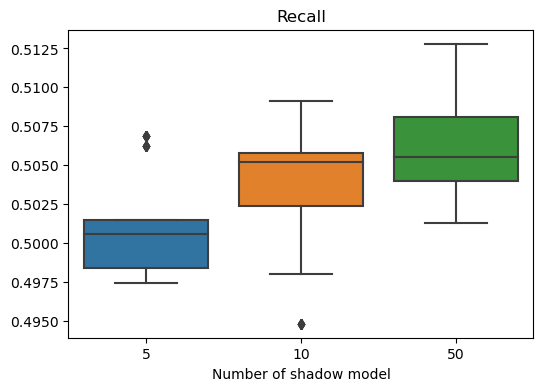

In [34]:
donnees=recup_data('./adult/data', [5,10,20,50])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['recall']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('Recall')
plt.xlabel('Number of shadow model')
plt.ylabel('')
plt.show()

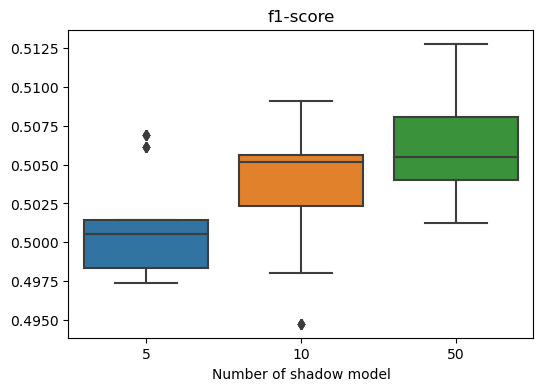

In [36]:
donnees=recup_data('./adult/data', [5,10,20,50])
for i in range(len(donnees['Valeur'])):
    donnees['Valeur'][i]=donnees['Valeur'][i]['weighted avg']['f1-score']
df = pd.DataFrame(donnees)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Groupe', y='Valeur', data=df)
plt.title('f1-score')
plt.xlabel('Number of shadow model')
plt.ylabel('')
plt.show()

## Result on MNIST